## Tugas:
### Buatlah sebuah model K-Means dengan ketentuan,

1.Gunakan data 'Mall_Customers.csv'
2.Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3.Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4.Buatlah implementasi model SOM untuk segmentasi citra lain

1.Gunakan data 'Mall_Customers.csv'

In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data/Mall_Customers.csv')

2.Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [ ]:
from sklearn.calibration import LabelEncoder


labelencoder=LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [7]:
X = df.iloc[:, 3:]

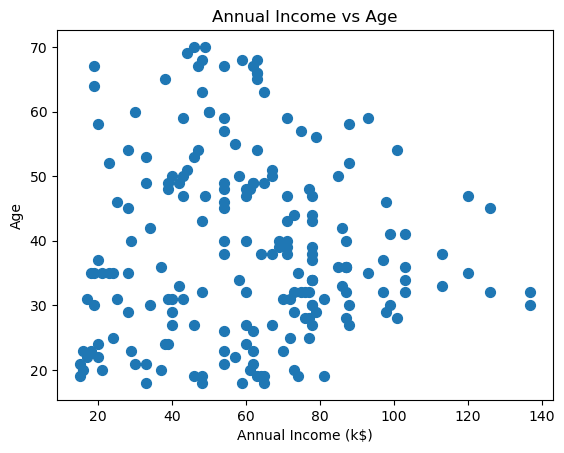

In [13]:
import matplotlib.pyplot as plt

plt.title('Annual Income vs Age')
plt.scatter(df['Annual Income (k$)'], df['Age'], s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()


3.Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

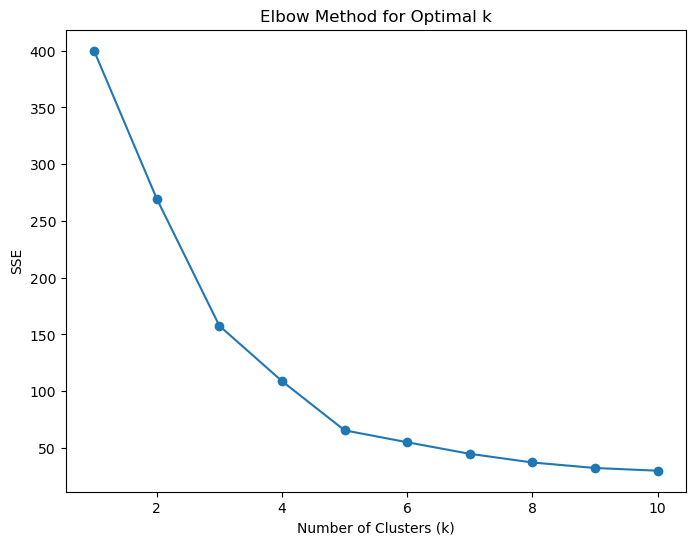

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standarisasi data (opsional, tetapi umumnya disarankan)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menginisialisasi list untuk menyimpan nilai SSE (Sum of Squared Errors) untuk berbagai nilai k
sse = []

# Mencoba beberapa nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Menggambar plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

In [17]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1): print(f'k={idx}; SSE={sse_val}')

k=1; SSE=400.0
k=2; SSE=269.69101219276394
k=3; SSE=157.70400815035947
k=4; SSE=108.92131661364357
k=5; SSE=65.5684081557168
k=6; SSE=55.05734827038599
k=7; SSE=44.86475569922556
k=8; SSE=37.228187677585886
k=9; SSE=32.39226763033116
k=10; SSE=29.981897788243693


4.Buatlah implementasi model SOM untuk segmentasi citra lain

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [26]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

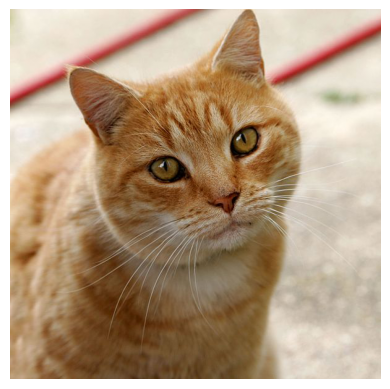

In [56]:
from skimage import io
import matplotlib.pyplot as plt

# Ganti 'cat.jpg' dengan path ke citra yang ingin Anda gunakan
cat_path = "data/cat.jpg"
cat = io.imread(cat_path) / 255.0  # Membaca citra dan normalisasi intensitas piksel menjadi rentang [0, 1]

# Menampilkan citra asli dengan normalisasi
plt.imshow(cat)
plt.axis('off')  # Untuk menyembunyikan sumbu
plt.show()


In [58]:
# Latih SOM
num_epochs = 10
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(cat, num_epochs, initial_learning_rate, initial_neighborhood_radius)

plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Citra')
plt.show()